In [1]:
import pandas as pan
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# nacitanie datasetu a jeho parametre
mushroomsDataset = pan.read_csv('mushrooms.csv')
mushroomsDataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
# metódy na úpravu datasetu - nahradenie písmen číslami

def convertCapShape(col):
    col = str(col)
    if col.startswith('b'):
        return 1
    if col.startswith('c'):
        return 2
    if col.startswith('x'):
        return 3
    if col.startswith('f'):
        return 4
    if col.startswith('k'):
        return 5
    if col.startswith('s'):
        return 6
    
def convertCapSurface(col):
    col = str(col)
    if col.startswith('f'):
        return 1
    if col.startswith('g'):
        return 2
    if col.startswith('y'):
        return 3
    if col.startswith('s'):
        return 4
    
def convertCapColor(col):
    col = str(col)
    if col.startswith('n'):
        return 1
    if col.startswith('b'):
        return 2
    if col.startswith('c'):
        return 3
    if col.startswith('g'):
        return 4
    if col.startswith('r'):
        return 5
    if col.startswith('p'):
        return 6
    if col.startswith('u'):
        return 7
    if col.startswith('e'):
        return 8
    if col.startswith('w'):
        return 9
    if col.startswith('y'):
        return 10
    
def convertOdor(col):
    col = str(col)
    if col.startswith('a'):
        return 1
    if col.startswith('l'):
        return 2
    if col.startswith('c'):
        return 3
    if col.startswith('y'):
        return 4
    if col.startswith('f'):
        return 5
    if col.startswith('m'):
        return 6
    if col.startswith('n'):
        return 7
    if col.startswith('p'):
        return 8
    if col.startswith('s'):
        return 9
    
def convertGillAttachment(col):
    col = str(col)
    if col.startswith('a'):
        return 1
    if col.startswith('d'):
        return 2
    if col.startswith('f'):
        return 3
    if col.startswith('n'):
        return 4
    
def convertGillSpacing(col):
    col = str(col)
    if col.startswith('c'):
        return 1
    if col.startswith('w'):
        return 2
    if col.startswith('d'):
        return 3
    
def convertGillColor(col):
    col = str(col)
    if col.startswith('k'):
        return 1
    if col.startswith('n'):
        return 2
    if col.startswith('b'):
        return 3
    if col.startswith('h'):
        return 4
    if col.startswith('g'):
        return 5
    if col.startswith('r'):
        return 6
    if col.startswith('o'):
        return 7
    if col.startswith('p'):
        return 8
    if col.startswith('u'):
        return 9
    if col.startswith('e'):
        return 10
    if col.startswith('w'):
        return 11
    if col.startswith('y'):
        return 12
    
def convertStalkRoot(col):
    col = str(col)
    if col.startswith('b'):
        return 1
    if col.startswith('c'):
        return 2
    if col.startswith('u'):
        return 3
    if col.startswith('e'):
        return 4
    if col.startswith('z'):
        return 5
    if col.startswith('r'):
        return 6
    if col.startswith('?'):
        return 0

def convertStalkSurfaceRing(col):
    col = str(col)
    if col.startswith('f'):
        return 1
    if col.startswith('y'):
        return 2
    if col.startswith('k'):
        return 3
    if col.startswith('s'):
        return 4

def convertStalkColorRing(col):
    col = str(col)
    if col.startswith('n'):
        return 1
    if col.startswith('b'):
        return 2
    if col.startswith('c'):
        return 3
    if col.startswith('g'):
        return 4
    if col.startswith('o'):
        return 5
    if col.startswith('p'):
        return 6
    if col.startswith('e'):
        return 7
    if col.startswith('w'):
        return 8
    if col.startswith('y'):
        return 9
    
def convertVeilColor(col):
    col = str(col)
    if col.startswith('n'):
        return 1
    if col.startswith('o'):
        return 2
    if col.startswith('w'):
        return 3
    if col.startswith('y'):
        return 4
    
def convertRingNumber(col):
    col = str(col)
    if col.startswith('n'):
        return 1
    if col.startswith('o'):
        return 2
    if col.startswith('t'):
        return 3
    
def convertRingType(col):
    col = str(col)
    if col.startswith('c'):
        return 1
    if col.startswith('e'):
        return 2
    if col.startswith('f'):
        return 3
    if col.startswith('l'):
        return 4
    if col.startswith('n'):
        return 5
    if col.startswith('p'):
        return 6
    if col.startswith('s'):
        return 7
    if col.startswith('z'):
        return 8
    
def convertSporePrintColor(col):
    col = str(col)
    if col.startswith('k'):
        return 1
    if col.startswith('n'):
        return 2
    if col.startswith('b'):
        return 3
    if col.startswith('h'):
        return 4
    if col.startswith('r'):
        return 5
    if col.startswith('o'):
        return 6
    if col.startswith('u'):
        return 7
    if col.startswith('w'):
        return 8
    if col.startswith('y'):
        return 9
    
def convertPopulation(col):
    col = str(col)
    if col.startswith('a'):
        return 1
    if col.startswith('c'):
        return 2
    if col.startswith('n'):
        return 3
    if col.startswith('s'):
        return 4
    if col.startswith('v'):
        return 5
    if col.startswith('y'):
        return 6
    
def convertHabitat(col):
    col = str(col)
    if col.startswith('g'):
        return 1
    if col.startswith('l'):
        return 2
    if col.startswith('m'):
        return 3
    if col.startswith('p'):
        return 4
    if col.startswith('u'):
        return 5
    if col.startswith('w'):
        return 6
    if col.startswith('d'):
        return 7

In [4]:
# úprava datasetu z písmen na čísla

rows = mushroomsDataset.shape[0]
mushroomsDataset['class']= np.where(mushroomsDataset['class']=='e', 1, 2)
mushroomsDataset['cap-shape'] = mushroomsDataset['cap-shape'].apply(convertCapShape)
mushroomsDataset['cap-surface'] = mushroomsDataset['cap-surface'].apply(convertCapSurface)
mushroomsDataset['cap-color'] = mushroomsDataset['cap-color'].apply(convertCapColor)
mushroomsDataset['bruises']= np.where(mushroomsDataset['bruises']=='t', 1, 2)
mushroomsDataset['odor'] = mushroomsDataset['odor'].apply(convertOdor)
mushroomsDataset['gill-attachment'] = mushroomsDataset['gill-attachment'].apply(convertGillAttachment)
mushroomsDataset['gill-spacing'] = mushroomsDataset['gill-spacing'].apply(convertGillSpacing)
mushroomsDataset['gill-size']= np.where(mushroomsDataset['gill-size']=='b', 1, 2)
mushroomsDataset['gill-color'] = mushroomsDataset['gill-color'].apply(convertGillColor)
mushroomsDataset['stalk-shape']= np.where(mushroomsDataset['stalk-shape']=='e', 1, 2)
mushroomsDataset['stalk-root'] = mushroomsDataset['stalk-root'].apply(convertStalkRoot)
mushroomsDataset['stalk-surface-above-ring'] = mushroomsDataset['stalk-surface-above-ring'].apply(convertStalkSurfaceRing)
mushroomsDataset['stalk-surface-below-ring'] = mushroomsDataset['stalk-surface-below-ring'].apply(convertStalkSurfaceRing)
mushroomsDataset['stalk-color-above-ring'] = mushroomsDataset['stalk-color-above-ring'].apply(convertStalkColorRing)
mushroomsDataset['stalk-color-below-ring'] = mushroomsDataset['stalk-color-below-ring'].apply(convertStalkColorRing)
mushroomsDataset['veil-type']= np.where(mushroomsDataset['veil-type']=='p', 1, 2)
mushroomsDataset['veil-color'] = mushroomsDataset['veil-color'].apply(convertVeilColor)
mushroomsDataset['ring-number'] = mushroomsDataset['ring-number'].apply(convertRingNumber)
mushroomsDataset['ring-type'] = mushroomsDataset['ring-type'].apply(convertRingType)
mushroomsDataset['spore-print-color'] = mushroomsDataset['spore-print-color'].apply(convertSporePrintColor)
mushroomsDataset['population'] = mushroomsDataset['population'].apply(convertPopulation)
mushroomsDataset['habitat'] = mushroomsDataset['habitat'].apply(convertHabitat)

In [5]:
#trainX = trainData.drop('class', axis=1)
#testX = testData.drop('class', axis=1)
#trainY = trainData['class']
#testY = testData['class']

# rozdelenie datasetu na testovacie a trénovacie dáta
trainX, testX, trainY, testY = train_test_split(mushroomsDataset.drop('class', axis=1), mushroomsDataset['class'], test_size=0.2, shuffle= True)

In [6]:
# trénovanie neurónovej siete

kategorieTrain = np_utils.to_categorical(trainY)
model = Sequential()
model.add(Dense(25, input_dim=22, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
history = model.fit(trainX,kategorieTrain, epochs=30)

Epoch 1/30
6499/6499 [==============================] - 1s 106us/step - loss: 0.1309 - acc: 0.7440
Epoch 2/30
6499/6499 [==============================] - 0s 73us/step - loss: 0.0695 - acc: 0.8735
Epoch 3/30
6499/6499 [==============================] - 0s 69us/step - loss: 0.0438 - acc: 0.9181
Epoch 4/30
6499/6499 [==============================] - 0s 62us/step - loss: 0.0262 - acc: 0.9565
Epoch 5/30
6499/6499 [==============================] - 0s 62us/step - loss: 0.0199 - acc: 0.9654
Epoch 6/30
6499/6499 [==============================] - 0s 74us/step - loss: 0.0170 - acc: 0.9705
Epoch 7/30
6499/6499 [==============================] - 0s 73us/step - loss: 0.0138 - acc: 0.9762
Epoch 8/30
6499/6499 [==============================] - 0s 72us/step - loss: 0.0122 - acc: 0.9791
Epoch 9/30
6499/6499 [==============================] - 0s 77us/step - loss: 0.0091 - acc: 0.9860
Epoch 10/30
6499/6499 [==============================] - 0s 70us/step - loss: 0.0071 - acc: 0.9911
Epoch 11/30
6499/6

In [7]:
# evaulácia a predikcia neznámych dát

scores = model.evaluate(trainX, kategorieTrain)
print("\nAccuracy: %.2f%%" % (scores[1]*100))
nezname = model.predict_classes(testX)
confusion_matrix(testY.values, nezname)

6499/6499 [==============================] - 0s 41us/step

Accuracy: 100.00%


array([[824,   0],
       [  0, 801]])


Presnosť:


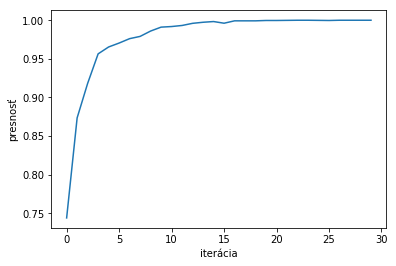


Chyba:


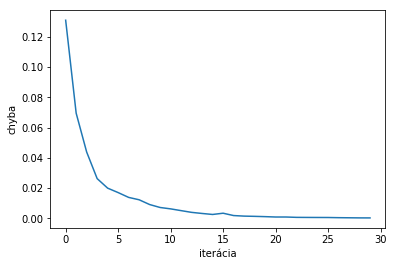

In [12]:
# grafy

print("\nPresnosť:")
plt.plot(history.history['acc'])
plt.xlabel('iterácia')
plt.ylabel('presnosť')
plt.show()
print("\nChyba:")
plt.plot(history.history['loss'])
plt.xlabel('iterácia')
plt.ylabel('chyba')
plt.show()